In [20]:
import sys
import os
import pandas as pd
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
sys.path.append('..')

In [21]:
import rbf_functions

In [22]:
rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

#Load reference set for each RBF
pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../notebooks/refsets/"
    results = pd.read_csv(output_dir + name+ '_refset.csv')
    results['environment'] = 1 - results['environment']
    pareto_sets[name] = results


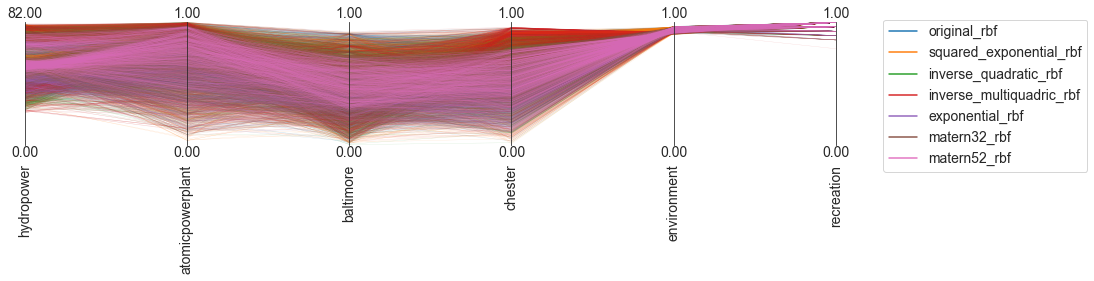

In [23]:
limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0,0,0,0,0,0]
limits.loc[1] = [82,1,1,1,1,1]
axes = ParallelAxes(limits)

sns.color_palette()

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=0.3, color=c, alpha=0.2)

axes.legend()

# plt.show()

In [18]:
limits = get_limits(pd.concat(pareto_sets.values()))
limits.loc[0] = [0,0,0,0,0,0]
limits.loc[1] = [82,1,1,1,1,1]

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes = ParallelAxes(limits, rot=0)    
    axes.plot(v, label=k, lw=1, color=c, alpha=0.2)
#     axes.legend()
    plt.savefig(f'figs/{k}/{k}_parcoords_compare.png')

plt.show()

      hydropower  atomicpowerplant  baltimore   chester  environment  \
0      73.703711          0.862714   0.666536  0.771407     0.916151   
1      71.338386          0.841340   0.459287  0.553534     0.921845   
2      76.572454          0.931601   0.676782  0.755022     0.913485   
3      64.625256          0.692799   0.419601  0.611561     0.925108   
4      75.387023          0.889018   0.452169  0.853073     0.918153   
...          ...               ...        ...       ...          ...   
1509   57.246330          0.489306   0.608132  0.800063     0.940300   
1510   56.523732          0.932234   0.607641  0.802262     0.931942   
1511   55.024095          0.659826   0.860005  0.771115     0.933857   
1512   58.054266          0.935207   0.517545  0.840127     0.935001   
1513   56.603402          0.956970   0.721171  0.861747     0.923364   

      recreation  
0       1.000000  
1       1.000000  
2       1.000000  
3       1.000000  
4       1.000000  
...          ...  
15

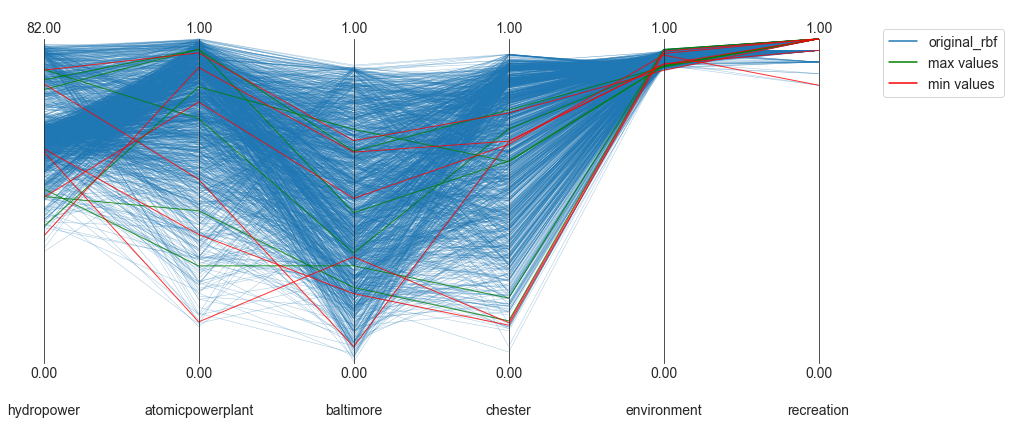

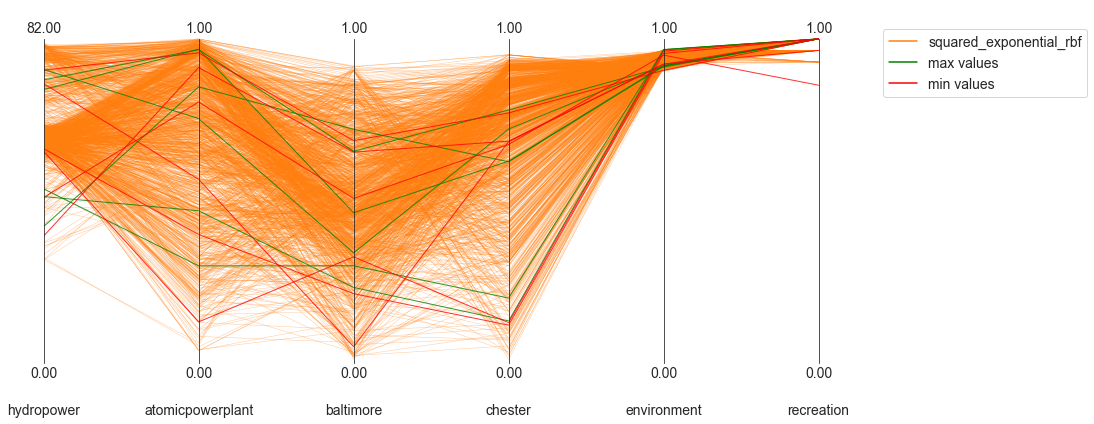

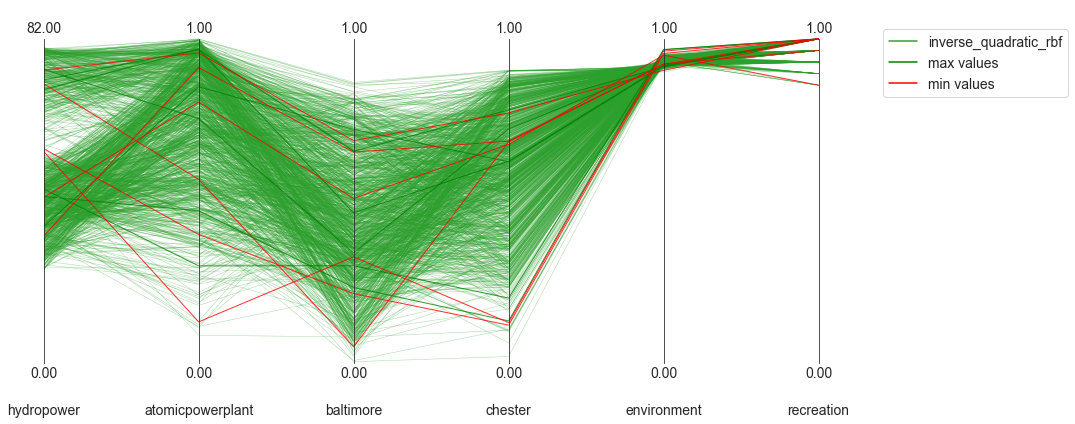

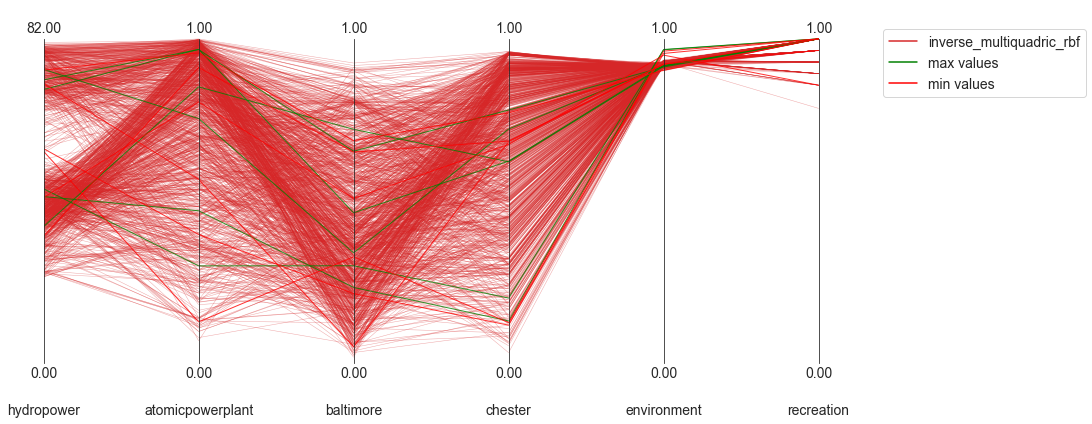

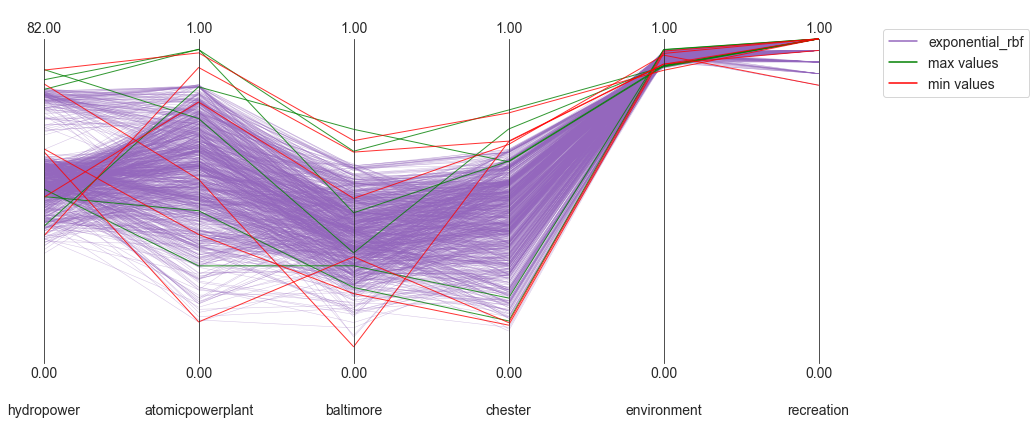

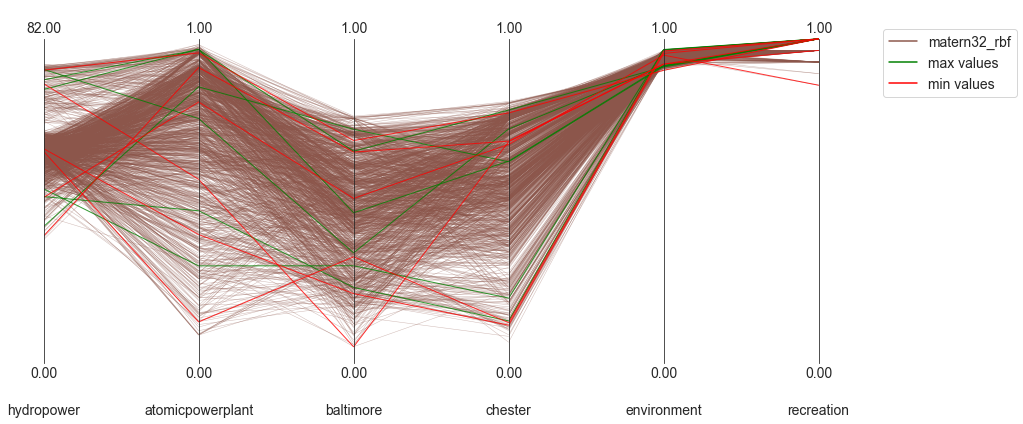

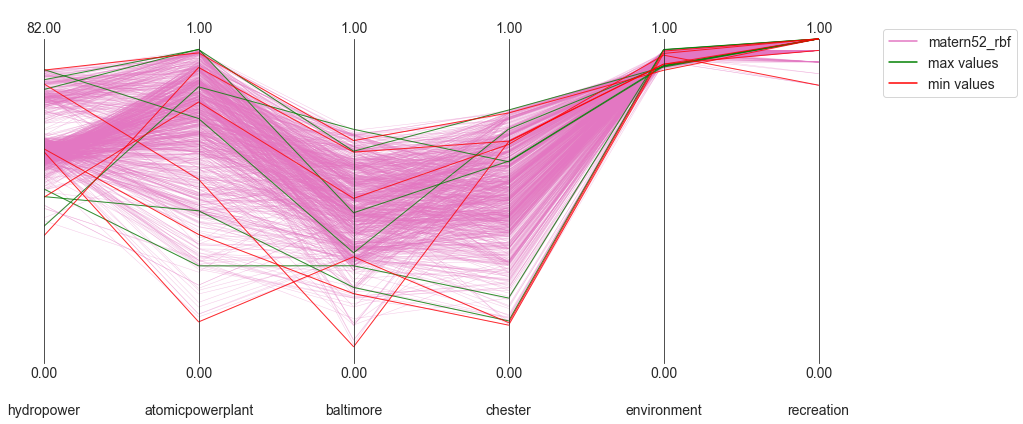

In [8]:
# for entry in rbfs:
for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
#     name = entry.__name__
    df_rbf = pareto_sets[name].copy()
    df_max = pd.DataFrame(columns=df_rbf.columns)
    df_min = pd.DataFrame(columns=df_rbf.columns)
    for i in df_rbf.idxmax():
        df_max = df_max.append(df_rbf.loc[i])
    for i in df_rbf.idxmin():
        df_min= df_min.append(df_rbf.loc[i])

    limits = get_limits(df_rbf)
    limits.loc[0] = [0,0,0,0,0,0]
    limits.loc[1] = [82,1,1,1,1,1]
    axes = ParallelAxes(limits, rot=0)    
    axes.plot(v, label=k, lw=0.5, color=c, alpha=0.4)
    axes.plot(df_max, label='max values', lw=1, color='green', alpha=0.8)
    axes.plot(df_min, label='min values', lw=1, color='red', alpha=0.8)
    axes.legend()

# plt.savefig(f'figs/{name}/{name}_parcoords.jpg')


In [4]:
# matplotlib subfigure
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html

# fig, ax = plt.subplots(7, 1, figsize=(20,20)) #sharex=True, sharey='row'

fig = plt.figure(constrained_layout=True, figsize=(12, 30))
subfigs = fig.subfigures(7)

limits = get_limits(df_rbf)
limits.loc[0] = [0,0,0,0,0,0]
limits.loc[1] = [82,1,1,1,1,1]
for j, entry in enumerate(rbfs):
    name = entry.__name__
    df_rbf = pareto_sets[name].copy()
    df_max = pd.DataFrame(columns=df_rbf.columns)
    df_min = pd.DataFrame(columns=df_rbf.columns)
    for i in df_rbf.idxmax():
        df_max = df_max.append(df_rbf.loc[i])
    for i in df_rbf.idxmin():
        df_min= df_min.append(df_rbf.loc[i])
    subfigs[j] = ParallelAxes(limits, rot=0)    
    subfigs[j].plot(df_rbf, label=name, lw=0.5, color='grey', alpha=0.4)
#     axes.plot(df_max, label='max values', lw=1, color='green', alpha=0.8)
#     axes.plot(df_min, label='min values', lw=1, color='red', alpha=0.8)

NameError: name 'df_rbf' is not defined

<Figure size 864x2160 with 0 Axes>

In [24]:
for k, v in pareto_sets.items():
    v['rbf'] = k

combined = pd.concat(pareto_sets.values())    
combined.head()

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation,rbf
0,73.703711,0.862714,0.666536,0.771407,0.916151,1.0,original_rbf
1,71.338386,0.841340,0.459287,0.553534,0.921845,1.0,original_rbf
2,76.572454,0.931601,0.676782,0.755022,0.913485,1.0,original_rbf
3,64.625256,0.692799,0.419601,0.611561,0.925108,1.0,original_rbf
4,75.387023,0.889018,0.452169,0.853073,0.918153,1.0,original_rbf


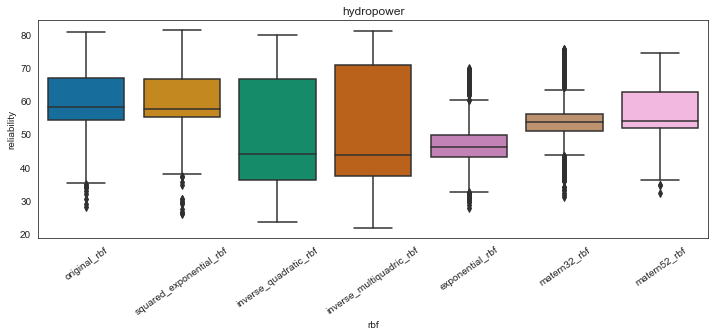

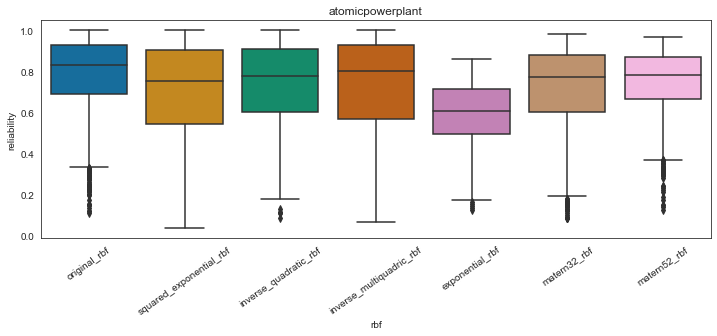

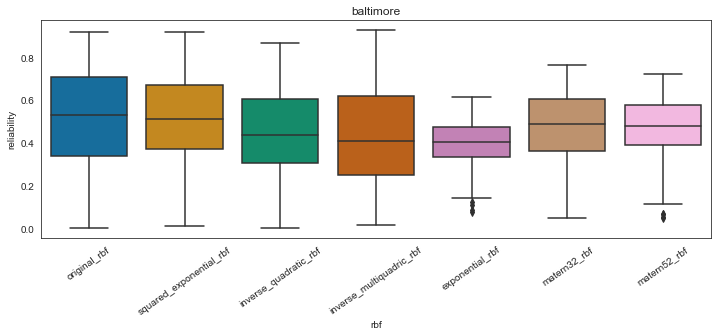

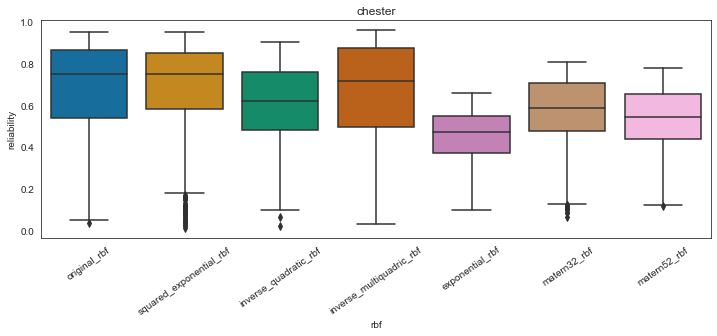

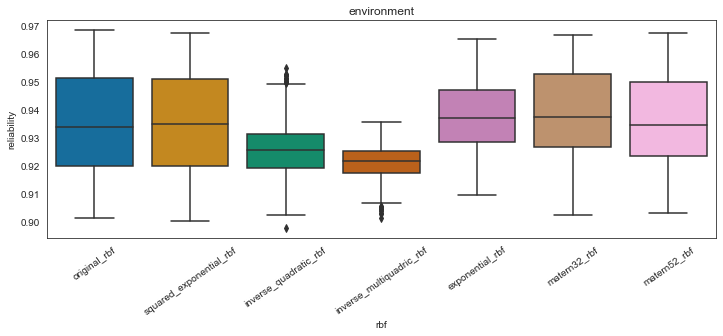

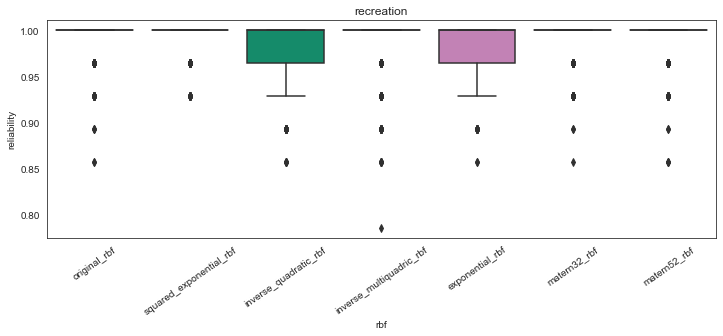

In [26]:
l=[]
for n in rbfs:
    l.append(n.__name__)

for entry in combined.columns[0:-1]:
    data = combined[[entry, 'rbf']]
    sns.boxplot(data=data, y=entry,x='rbf', order=l, palette = "colorblind")
    plt.title(entry)
    plt.ylabel("reliability")
    plt.xticks(rotation=35)
    plt.show()

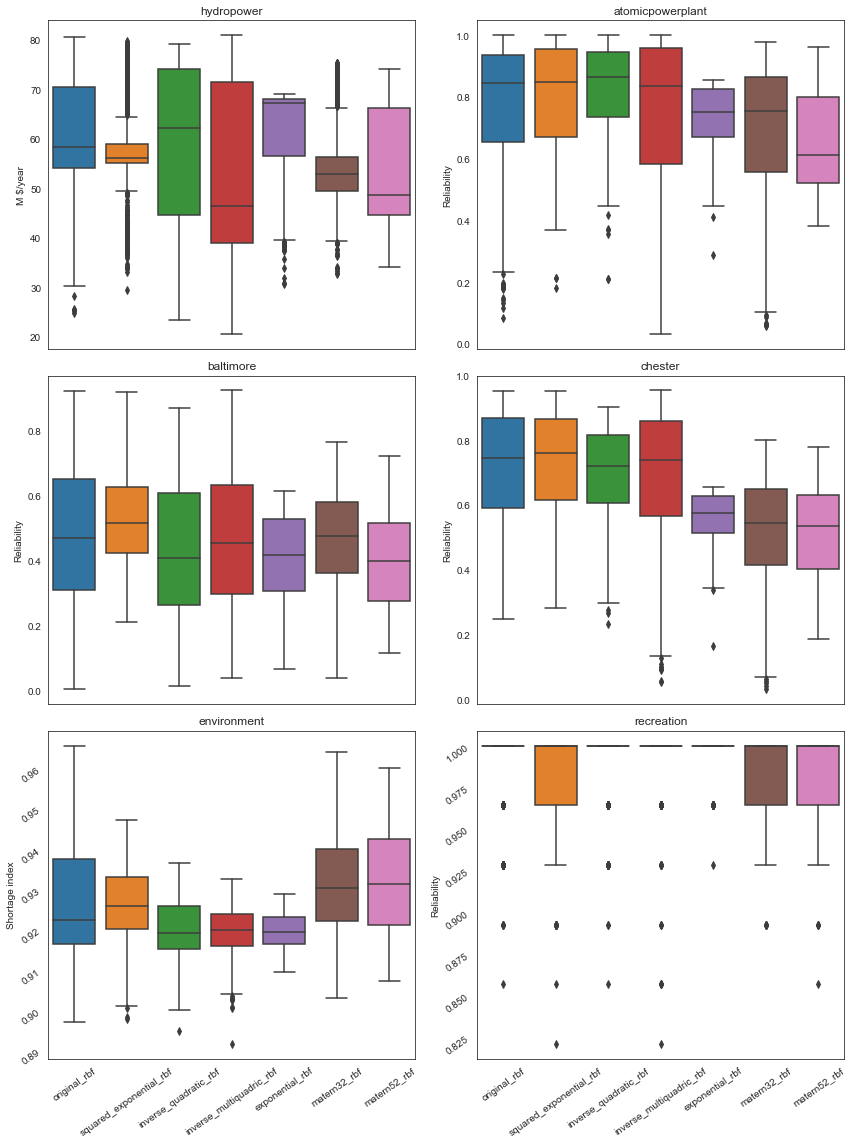

In [130]:
fig, ax = plt.subplots(3, 2, sharex=True, figsize=(12,16))

x=0
for i, entry in enumerate(combined.columns[0:-1]):
    x = i/2
    data = combined[[entry, 'rbf']]
    if i%2:
        sns.boxplot(ax=ax[int(x),1], data=data, y=entry, x='rbf', order=l)
        ax[int(x),1].set_title(entry)
        ax[int(x),1].set_ylabel("Reliability")
        ax[int(x),1].set_xlabel(None)
    else:
        sns.boxplot(ax=ax[int(x),0], data=data, y=entry, x='rbf', order=l)
        ax[int(x),0].set_title(entry)
        ax[int(x),0].set_xlabel(None)
        if x == 0:
            ax[int(x),0].set_ylabel("M $/year")
        elif x == 2:
            ax[int(x),0].set_ylabel("Shortage index")
        else:
            ax[int(x),0].set_ylabel("Reliability")
    ax[2,0].tick_params(labelrotation=35)
    ax[2,1].tick_params(labelrotation=35)
fig.tight_layout()